<a href="https://colab.research.google.com/github/ussalbt/datascience/blob/main/Heart_Stroke_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# Ingest the data to notebook

In [4]:
df1 = pd.read_csv("/content/sample_data/heart.csv")
df = df1.copy()

# EDA

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000000,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0000000,54.3663366,9.0821010,29.0000000,47.5000000,55.0000000,61.0000000,77.0000000
sex,303.0000000,0.6831683,0.4660108,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
cp,303.0000000,0.9669967,1.0320525,0.0000000,0.0000000,1.0000000,2.0000000,3.0000000
trestbps,303.0000000,131.6237624,17.5381428,94.0000000,120.0000000,130.0000000,140.0000000,200.0000000
chol,303.0000000,246.2640264,51.8307510,126.0000000,211.0000000,240.0000000,274.5000000,564.0000000
fbs,303.0000000,0.1485149,0.3561979,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
restecg,303.0000000,0.5280528,0.5258596,0.0000000,0.0000000,1.0000000,1.0000000,2.0000000
thalach,303.0000000,149.6468647,22.9051611,71.0000000,133.5000000,153.0000000,166.0000000,202.0000000
exang,303.0000000,0.3267327,0.4697945,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000
oldpeak,303.0000000,1.0396040,1.1610750,0.0000000,0.0000000,0.8000000,1.6000000,6.2000000


In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
numerical= df.drop(['target'], axis=1).select_dtypes('number').columns

print(f'Numerical Columns:  {df1[numerical].columns}')

Numerical Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [15]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [17]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0000000,2,4,2,1


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(302, 14)

In [20]:
miss_val=[]
[miss_value.append(i) for i in df1.columns if any(df[i].isnull())]
miss_val

[]

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

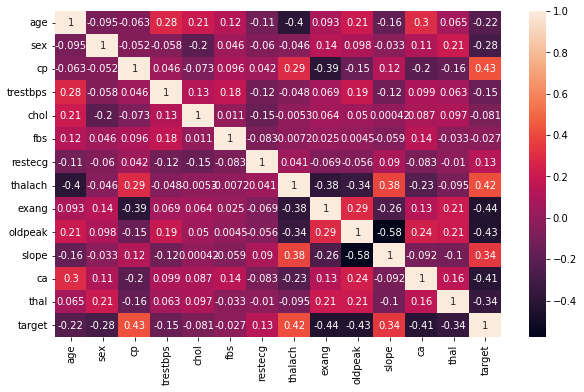

In [24]:
sns.heatmap(df.corr(),annot=True);

In [25]:
df["target"].describe()

count   302.0000000
mean      0.5430464
std       0.4989704
min       0.0000000
25%       0.0000000
50%       1.0000000
75%       1.0000000
max       1.0000000
Name: target, dtype: float64

In [28]:
print(f"Skewness: {df['target'].skew()}")

Skewness: -0.17369101189529737


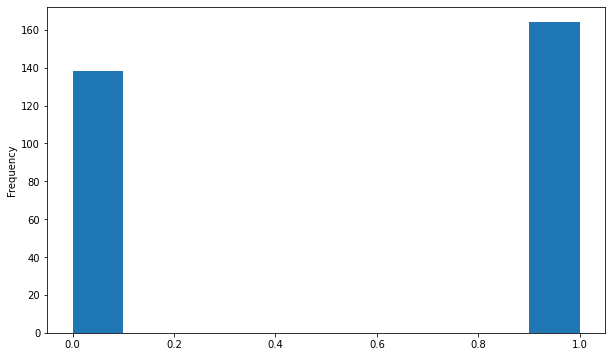

In [33]:
df["target"].plot(kind='hist');

In [34]:
df[numerical].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000
mean,54.4205298,0.6821192,0.9635762,131.6026490,246.5000000,0.1490066,0.5264901,149.5695364,0.3278146,1.0430464,1.3973510,0.7185430,2.3145695
std,9.0479697,0.4664257,1.0320436,17.5633942,51.7534887,0.3566860,0.5260272,22.9035273,0.4701960,1.1614523,0.6162740,1.0067483,0.6130255
min,29.0000000,0.0000000,0.0000000,94.0000000,126.0000000,0.0000000,0.0000000,71.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,48.0000000,0.0000000,0.0000000,120.0000000,211.0000000,0.0000000,0.0000000,133.2500000,0.0000000,0.0000000,1.0000000,0.0000000,2.0000000
50%,55.5000000,1.0000000,1.0000000,130.0000000,240.5000000,0.0000000,1.0000000,152.5000000,0.0000000,0.8000000,1.0000000,0.0000000,2.0000000
75%,61.0000000,1.0000000,2.0000000,140.0000000,274.7500000,0.0000000,1.0000000,166.0000000,1.0000000,1.6000000,2.0000000,1.0000000,3.0000000
max,77.0000000,1.0000000,3.0000000,200.0000000,564.0000000,1.0000000,2.0000000,202.0000000,1.0000000,6.2000000,2.0000000,4.0000000,3.0000000


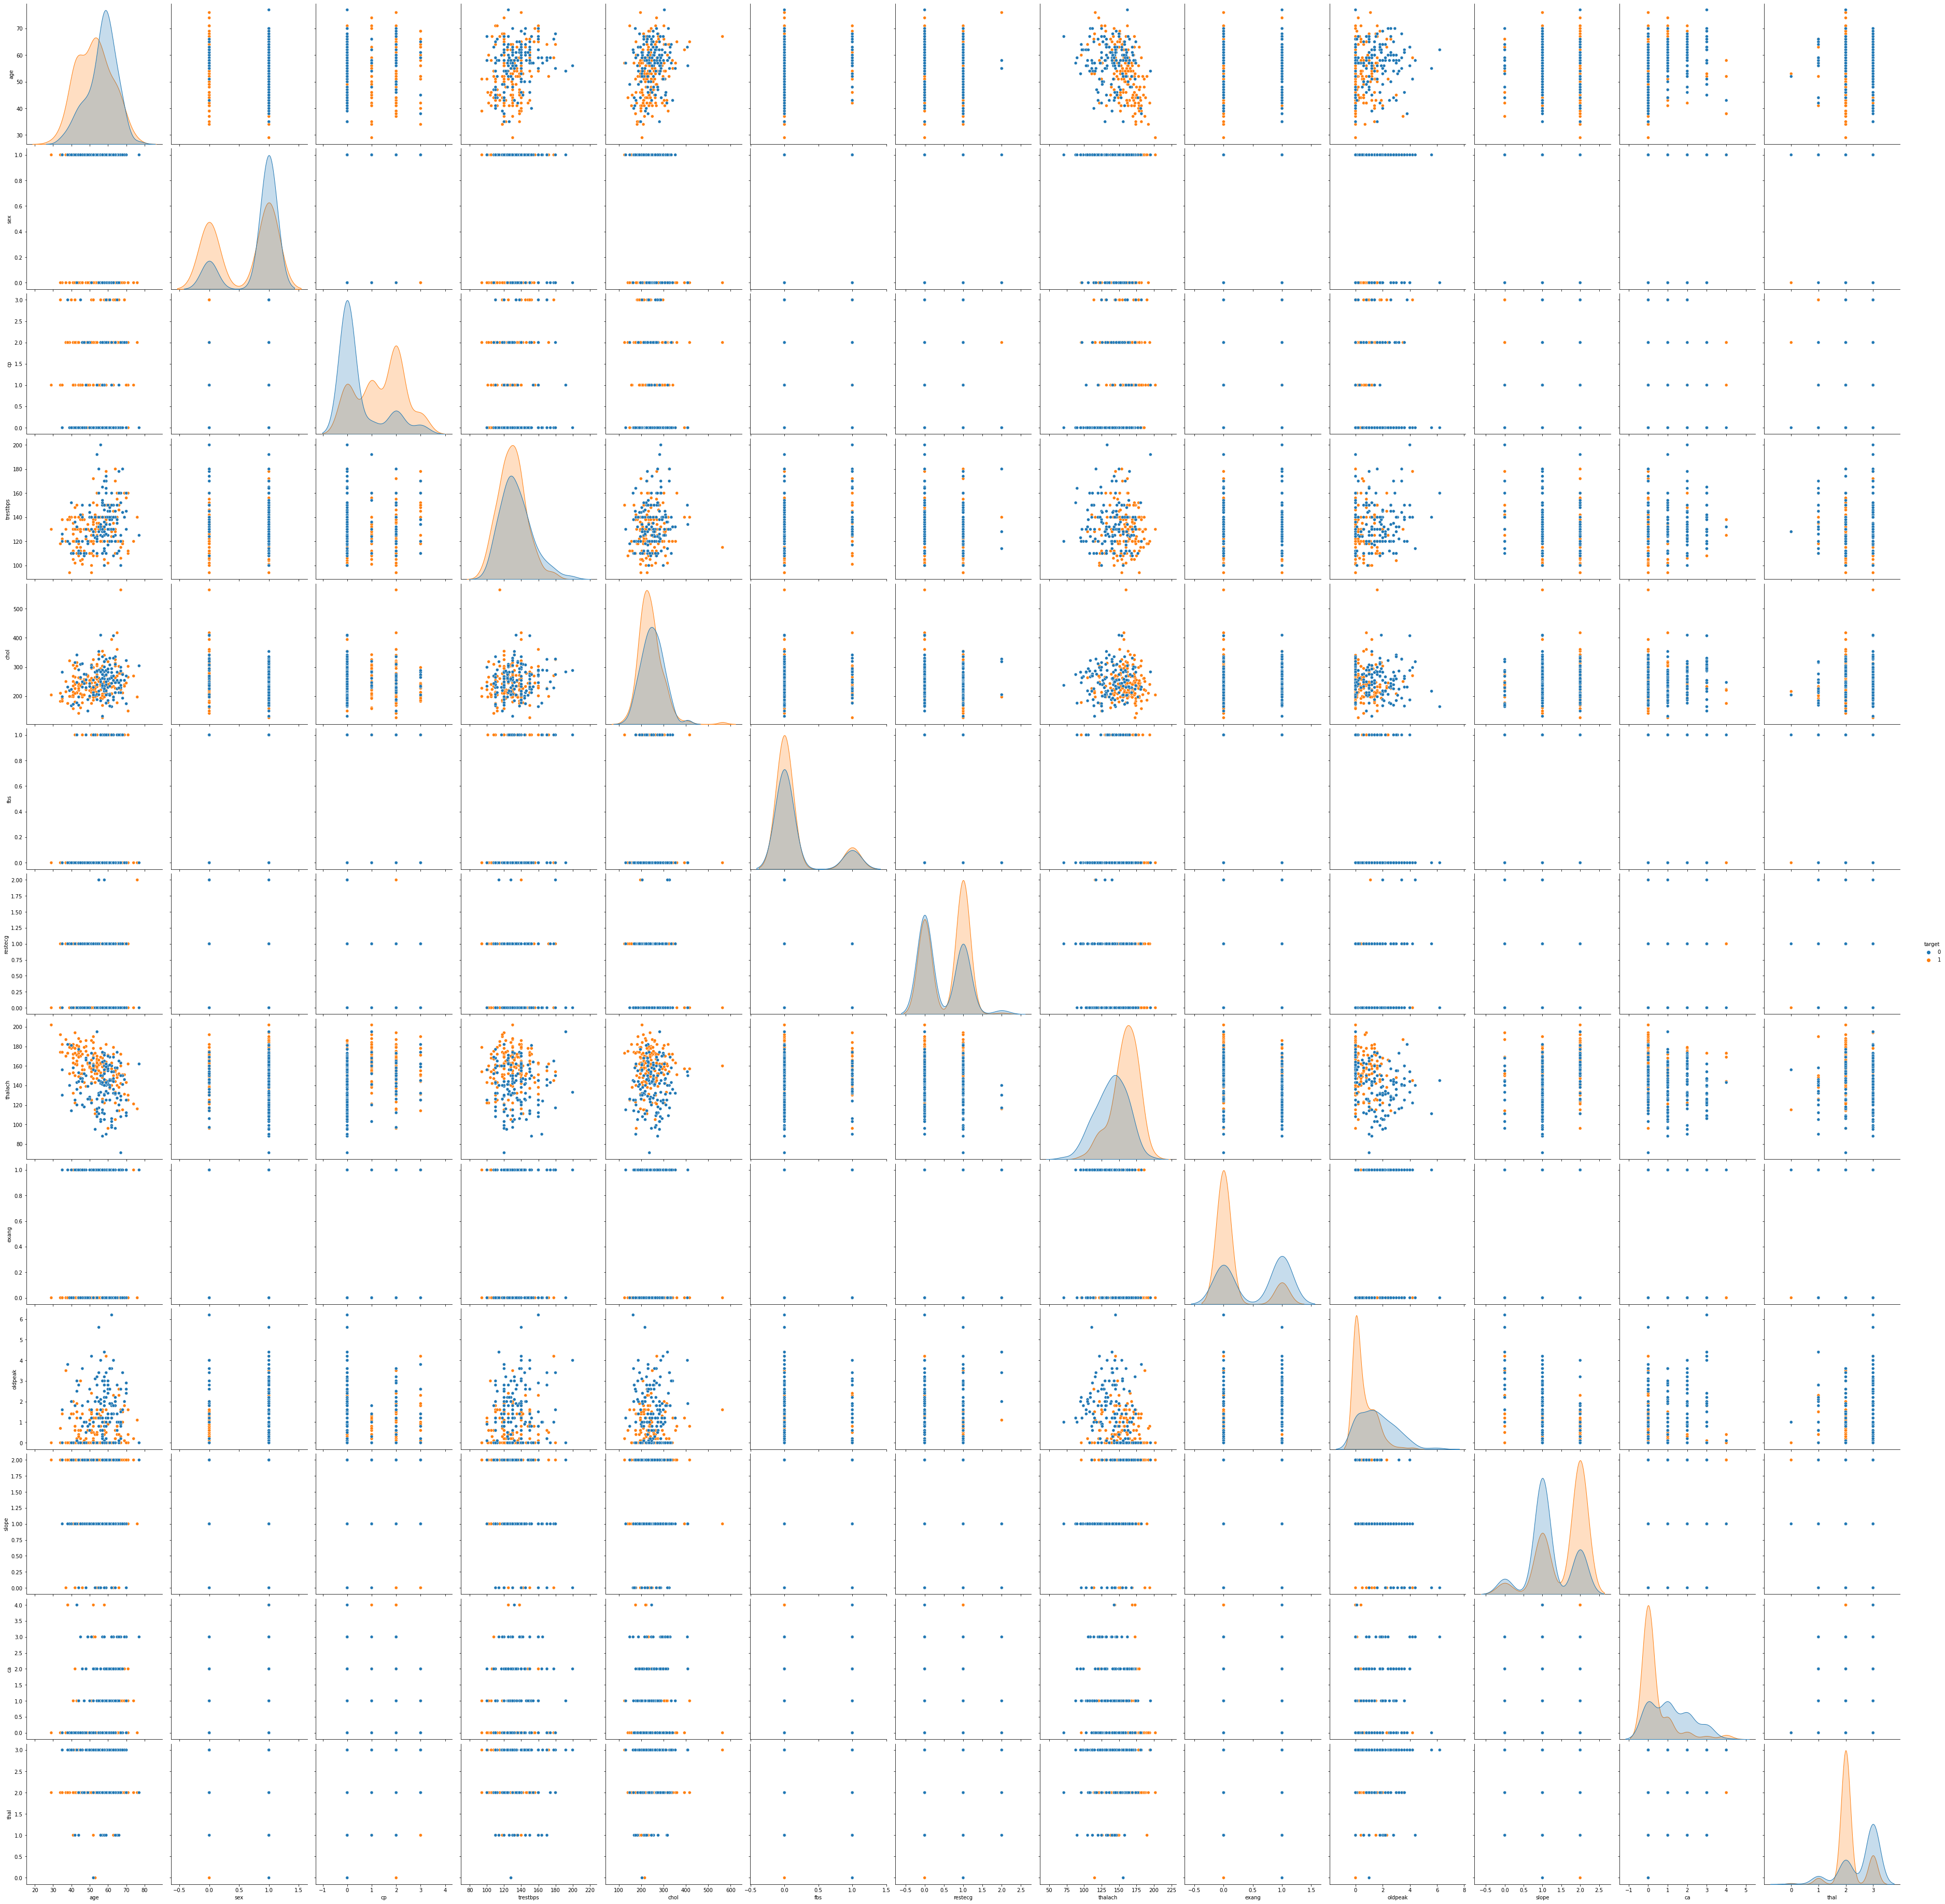

In [37]:
#sns.pairplot(data=df1, hue="target", height=4, aspect =1);

In [39]:
df[numerical].iplot(kind='hist')

In [40]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

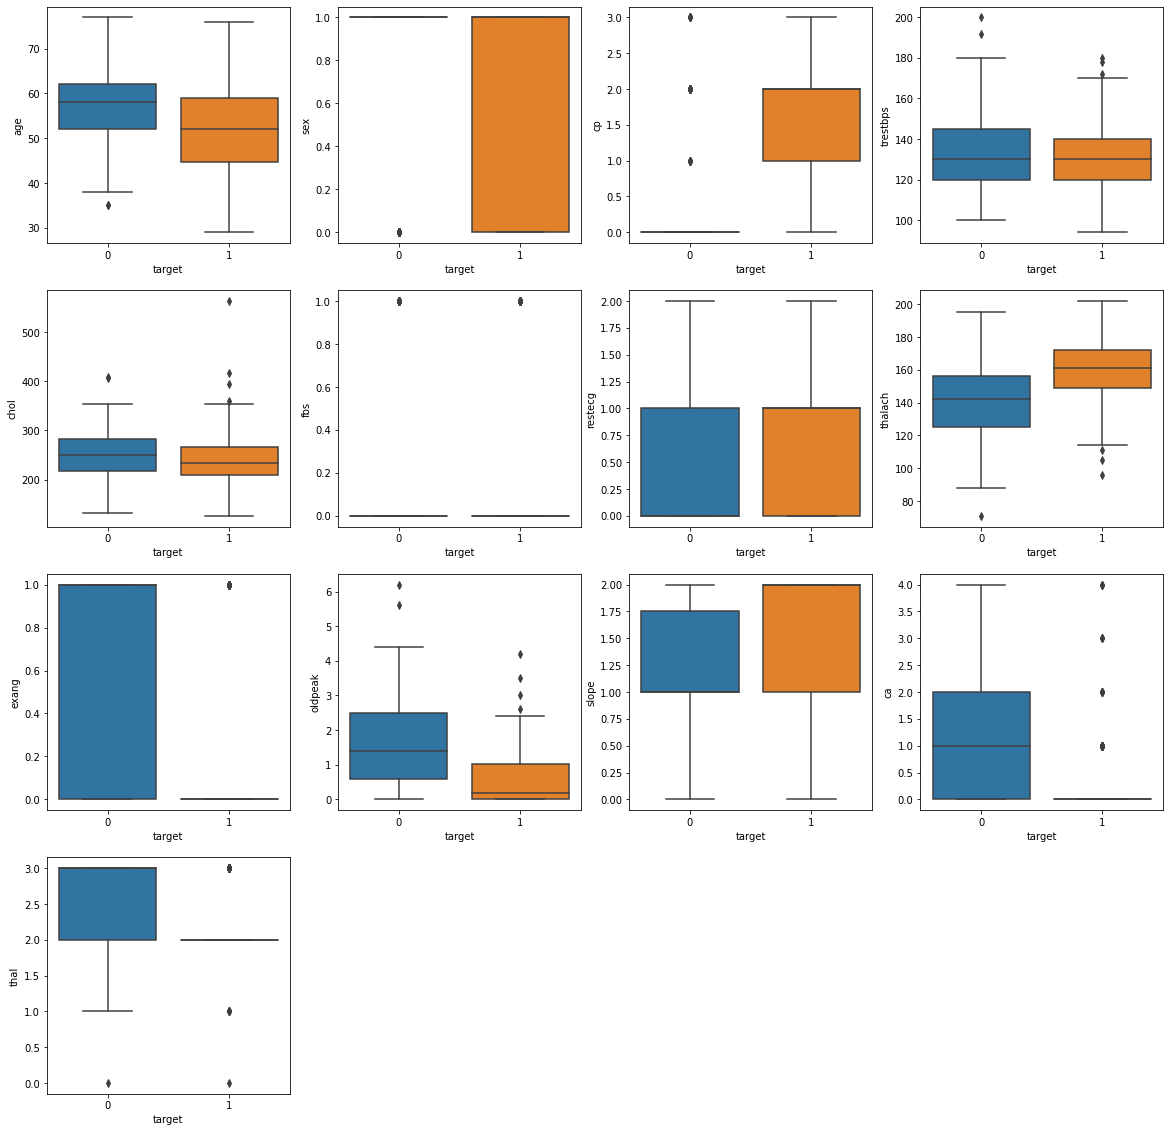

In [41]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

In [42]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

fbs        1.9812009
ca         1.2957385
oldpeak    1.2661727
chol       1.1473324
sex       -0.7861201
dtype: float64

In [43]:
#df[skew_cols.index].iplot(kind='hist');

In [44]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

# Data Preprocessing

In [45]:
X = df.drop("target", axis=1)
y = df["target"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()

In [53]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [54]:
y_test_pred=log_model.predict(X_test_scaled)

In [55]:
y_test_pred_proba = log_model.predict_proba(X_test_scaled)

In [56]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
285,46,1,0,140,311,0,1,120,1,1.8000000,1,2,3,0,0,0.0355331
232,55,1,0,160,289,0,0,145,1,0.8000000,1,1,3,0,0,0.0527805
90,48,1,2,124,255,1,1,175,0,0.0000000,2,2,2,1,1,0.8217813
76,51,1,2,125,245,1,0,166,0,2.4000000,1,0,2,1,1,0.7024683
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.2285665
292,58,0,0,170,225,1,0,146,1,2.8000000,1,2,1,0,0,0.2404086
125,34,0,1,118,210,0,1,192,0,0.7000000,2,0,2,1,1,0.9668017
82,60,0,2,102,318,0,1,160,0,0.0000000,2,1,2,1,1,0.9505582
78,52,1,1,128,205,1,1,184,0,0.0000000,2,0,2,1,1,0.8914890
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7580737


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [58]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



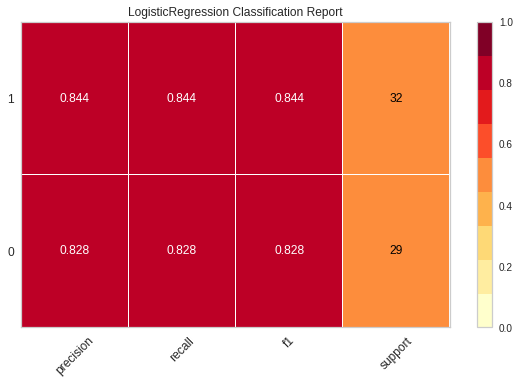

In [61]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [62]:
from sklearn.model_selection import cross_validate

In [63]:
model = LogisticRegression()
model


LogisticRegression()

In [64]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.8381667
test_precision   0.8387225
test_recall      0.8868132
test_f1          0.8567534
dtype: float64

In [66]:
log_model_GridSearch = LogisticRegression(solver='saga', max_iter=5000)

In [68]:
charges= ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"charges" : charges,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [70]:
grid_model = GridSearchCV(log_model_GridSearch, param_grid = param_grid)

In [74]:
grid_model.fit(X_train_scaled,y_train)

ValueError: ignored

In [73]:
grid_model.best_params_

AttributeError: ignored

# Implement KNN and Evaluate

In [75]:
X = df.drop("target", axis=1)
y = df["target"]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()

In [79]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [82]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [83]:
y_test_pred = knn_model.predict(scaled_X_test)
y_test_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
y_test_pred_proba = knn_model.predict_proba(scaled_X_test)
y_test_pred_proba

array([[1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. ,

In [85]:
pd.DataFrame(y_test_pred_proba)

,0,1
0,1.0000000,0.0000000
1,0.4000000,0.6000000
2,0.0000000,1.0000000
3,1.0000000,0.0000000
4,0.2000000,0.8000000
5,0.0000000,1.0000000
6,0.8000000,0.2000000
7,1.0000000,0.0000000
8,1.0000000,0.0000000
9,0.4000000,0.6000000


In [87]:
my_dict = {"Actual": y_test, "Pred":y_test_pred, "Proba_1":y_test_pred_proba[:,1], "Proba_0":y_test_pred_proba[:,0]}

In [88]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
285,0,0,0.0000000,1.0000000
137,1,1,1.0000000,0.0000000
250,0,0,0.0000000,1.0000000
9,1,1,1.0000000,0.0000000
118,1,1,1.0000000,0.0000000
256,0,0,0.0000000,1.0000000
146,1,1,1.0000000,0.0000000
247,0,0,0.0000000,1.0000000
116,1,1,0.6000000,0.4000000
42,1,0,0.0000000,1.0000000


In [89]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [91]:
confusion_matrix(y_test, y_test_pred)

array([[27,  2],
       [ 7, 25]])

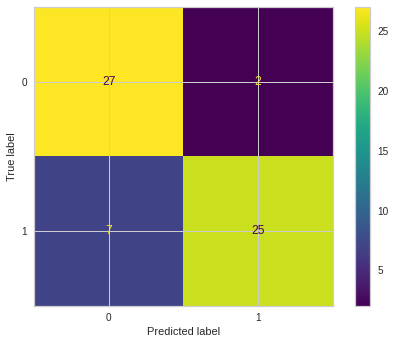

In [92]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [93]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[27  2]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# Visually compare models based on your chosen metric

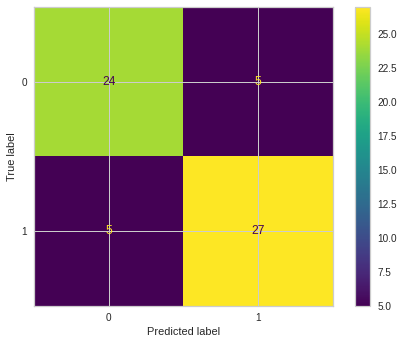

In [94]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [98]:
knn = KNeighborsClassifier(n_neighbors = 9, p = 1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[27  2]
 [ 5 27]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



skorlar yüksek olduğu için knn seçildi.

In [99]:
y_test_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[27  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Chose best model and make a random prediction 

In [100]:
scaler = MinMaxScaler().fit(X)

In [101]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [102]:
final_model = knn.fit(X_scaled, y)
final_model

KNeighborsClassifier(n_neighbors=9, p=1)

In [104]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000
mean,54.4205298,0.6821192,0.9635762,131.6026490,246.5000000,0.1490066,0.5264901,149.5695364,0.3278146,1.0430464,1.3973510,0.7185430,2.3145695
std,9.0479697,0.4664257,1.0320436,17.5633942,51.7534887,0.3566860,0.5260272,22.9035273,0.4701960,1.1614523,0.6162740,1.0067483,0.6130255
min,29.0000000,0.0000000,0.0000000,94.0000000,126.0000000,0.0000000,0.0000000,71.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,48.0000000,0.0000000,0.0000000,120.0000000,211.0000000,0.0000000,0.0000000,133.2500000,0.0000000,0.0000000,1.0000000,0.0000000,2.0000000
50%,55.5000000,1.0000000,1.0000000,130.0000000,240.5000000,0.0000000,1.0000000,152.5000000,0.0000000,0.8000000,1.0000000,0.0000000,2.0000000
75%,61.0000000,1.0000000,2.0000000,140.0000000,274.7500000,0.0000000,1.0000000,166.0000000,1.0000000,1.6000000,2.0000000,1.0000000,3.0000000
max,77.0000000,1.0000000,3.0000000,200.0000000,564.0000000,1.0000000,2.0000000,202.0000000,1.0000000,6.2000000,2.0000000,4.0000000,3.0000000


hocam buraya kadar anlayabildiklerimi yaptım. Teşekkkürler
